# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [364]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [365]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [366]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!

neighborhood_coordinates = pd.read_csv('neighborhoods_coordinates.csv')

sfo_neighborhoods_census = pd.read_csv('sfo_neighborhoods_census_data.csv')
mean_housing_units = pd.read_csv('mean_housing_units_per_year.csv')
file_path = Path("../sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")













- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [376]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_grp = sfo_data.groupby('year')['housing_units'].mean()
    housing_units_grp_plot = housing_units_grp.plot.bar(title='Housing Units in San Francisco from 2010 to 2016')
    plt.ylim([370000,387500])
    plt.ylabel('Housing Units')
    return housing_units_grp_plot


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_housing_cost_grp = sfo_data.groupby('year').mean().drop(columns=['housing_units'])
    average_gross_rent_plot = avg_housing_cost_grp.drop(columns=['sale_price_sqr_foot']).plot(title='Average Gross Rent by Year', color='purple')
    plt.ylabel('Price per Sqft')
    return average_gross_rent_plot 



def average_sales_price():
    """Average Sales Price Per Year."""
    avg_housing_cost_grp = sfo_data.groupby('year').mean().drop(columns=['housing_units'])   
    avg_sales_price_plot = avg_housing_cost_grp.drop(columns=['gross_rent']).plot(title='Average Price per Sqft by Year', color='red')
    plt.ylabel('Price per Sqft')
    return avg_sales_price_plot 
    



def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    avg_prices_by_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
    avg_prices_plot = avg_prices_by_neighborhood.hvplot(y='sale_price_sqr_foot', label='Average Sale Price per Sqft', groupby='neighborhood')
    return avg_prices_plot



def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    expensive_neighborhoods = sfo_data.reset_index().drop(columns=['year'])
    expensive_neighborhoods = expensive_neighborhoods.groupby(['neighborhood']).mean()
    expensive_neighborhoods = expensive_neighborhoods.sort_values(by='sale_price_sqr_foot', ascending=False)   
    expensive_neighborhoods_bar = expensive_neighborhoods.hvplot.bar(y='sale_price_sqr_foot', label='10 Most Expensive Neighborhoods in SFO', rot=90)
    return expensive_neighborhoods_bar 


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    avg_prices_by_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
    avg_price_bar = avg_prices_by_neighborhood.hvplot.bar(y=['sale_price_sqr_foot', 'gross_rent'], label='10 Most Expensive Neighborhoods', rot=90, groupby='neighborhood', ylabel='$', xlabel='Year')
    return avg_price_bar

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    """Neighborhood Map."""
    mean_neighborhood = sfo_data.groupby('neighborhood').mean()
    mean_neighborhood.reset_index(drop=True, inplace=True)
    neighborhood_data = pd.concat([neighborhood_coordinates, mean_neighborhood], axis=1)
    neighborhood_map = px.scatter_mapbox(
    neighborhood_data,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="Neighborhood",
    zoom=4
)
    return pn.pane.Plotly(neighborhood_map) 

    # YOUR CODE HERE!


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

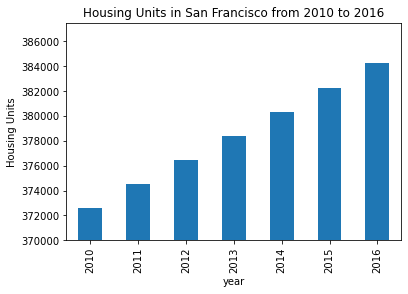

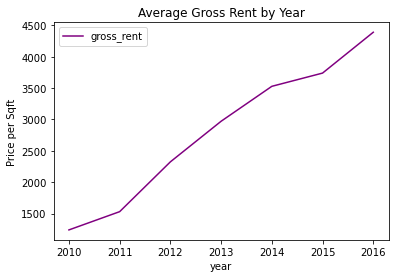

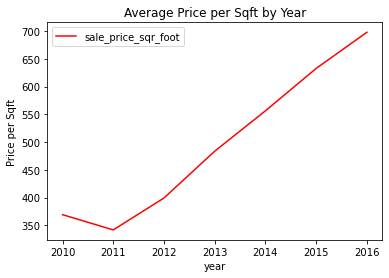

In [379]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
map_as_column = pn.Column(
    "# Real Estate Analysis of San Francisco from 2010 to 2016", 
    "## This is a visualization of real estate data in San Francisco by Year and Neighborhood. Enjoy this Map of the Neighborhoods in Question.",
    neighborhood_map
)





# Create a tab layout for the dashboard
# YOUR CODE HERE!
sfo_dashboard = pn.Tabs(
    ("Welcome", map_as_column),
    ("Per Year Data", formatted_row_data_per_year),
    ("Neighborhood Data", neighborhood_data_sfo)
)


    #("Neighborhood Analysis", row_of_parallel))

# Create Dashboard 
# YOUR CODE HERE!
row_data_per_year = pn.Row(housing_units_per_year())
row_data_per_year.append(average_gross_rent())
row_data_per_year.append(average_sales_price())

formatted_row_data_per_year = pn.Column("# Real Estate Analysis of San Francisco by Year", row_data_per_year,
                                       )


neighborhood_data_sfo = pn.Column("# Real Estate Analysis of San Francisco by Neighborhood", average_price_by_neighborhood(),
                                  top_most_expensive_neighborhoods(), most_expensive_neighborhoods_rent_sales())
                                       




## Serve the Panel Dashboard

In [380]:
# Serve the# dashboard
# YOUR CODE HERE!
sfo_dashboard.servable().show()

Launching server at http://localhost:64131


# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='year', ylabel='Housing Units'>

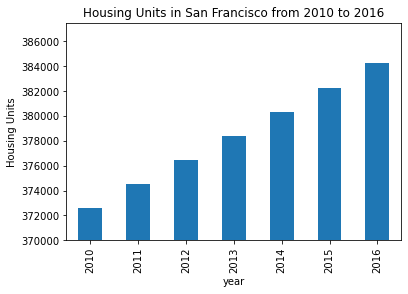

In [320]:
housing_units_per_year()

In [308]:
# average_gross_rent()

In [216]:
# average_sales_price()

In [127]:
# average_price_by_neighborhood()

In [128]:
# top_most_expensive_neighborhoods()

In [129]:
# most_expensive_neighborhoods_rent_sales()

In [241]:
neighborhood_map().show()

Launching server at http://localhost:62252


In [131]:
# parallel_categories()

In [132]:
# parallel_coordinates()

In [133]:
# sunburst()